In [97]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn import tree
import matplotlib.pyplot as plt
from datetime import  date
import seaborn as sns

In [129]:
data = pd.read_csv("period_add_dataset_raw.csv")
data

,cust_id,transaction_date,subscription_type,customer_country,transaction_type,customer_gender,age_group,referral_type,period,churn_result
0,1,2020-09-01,BASIC,Denmark,initial,Male,35-44,Google Ads,28,False
1,2,2022-03-01,BASIC,Denmark,initial,Female,18-24,facebook,10,False
2,3,2020-10-01,MAX,Norway,initial,Female,25-34,facebook,27,False
3,3,2022-02-01,BASIC,Norway,REDUCTION,Female,25-34,facebook,11,False
4,4,2022-05-01,PRO,Sweden,initial,Male,18-24,Display,8,False
...,...,...,...,...,...,...,...,...,...,...
17958,10364,2022-09-01,MAX,Norway,UPGRADE,Female,45-54,facebook,4,False
17959,10365,2021-05-01,PRO,Norway,initial,Male,55-65,Google Ads,20,False
17960,10365,2021-07-01,BASIC,Norway,REDUCTION,Male,55-65,Google Ads,18,False
17961,10366,2021-01-01,BASIC,Denmark,initial,Male,18-24,facebook,13,True


In [116]:
data.columns

Index(['cust_id', 'transaction_date', 'subscription_price',
       'subscription_type_BASIC', 'subscription_type_MAX',
       'subscription_type_PRO', 'customer_country_Denmark',
       'customer_country_Finland', 'customer_country_Norway',
       'customer_country_Sweden', 'transaction_type_CHURN',
       'transaction_type_REDUCTION', 'transaction_type_UPGRADE',
       'transaction_type_initial', 'customer_gender_Female',
       'customer_gender_Male', 'customer_gender_Other', 'referral_type_Bing',
       'referral_type_Display', 'referral_type_Google Ads',
       'referral_type_Organic Search', 'referral_type_Paid Search',
       'referral_type_TV', 'referral_type_Unknown', 'referral_type_facebook',
       'age_group_18-24', 'age_group_25-34', 'age_group_35-44',
       'age_group_45-54', 'age_group_55-65', 'period', 'churn_result'],
      dtype='object')

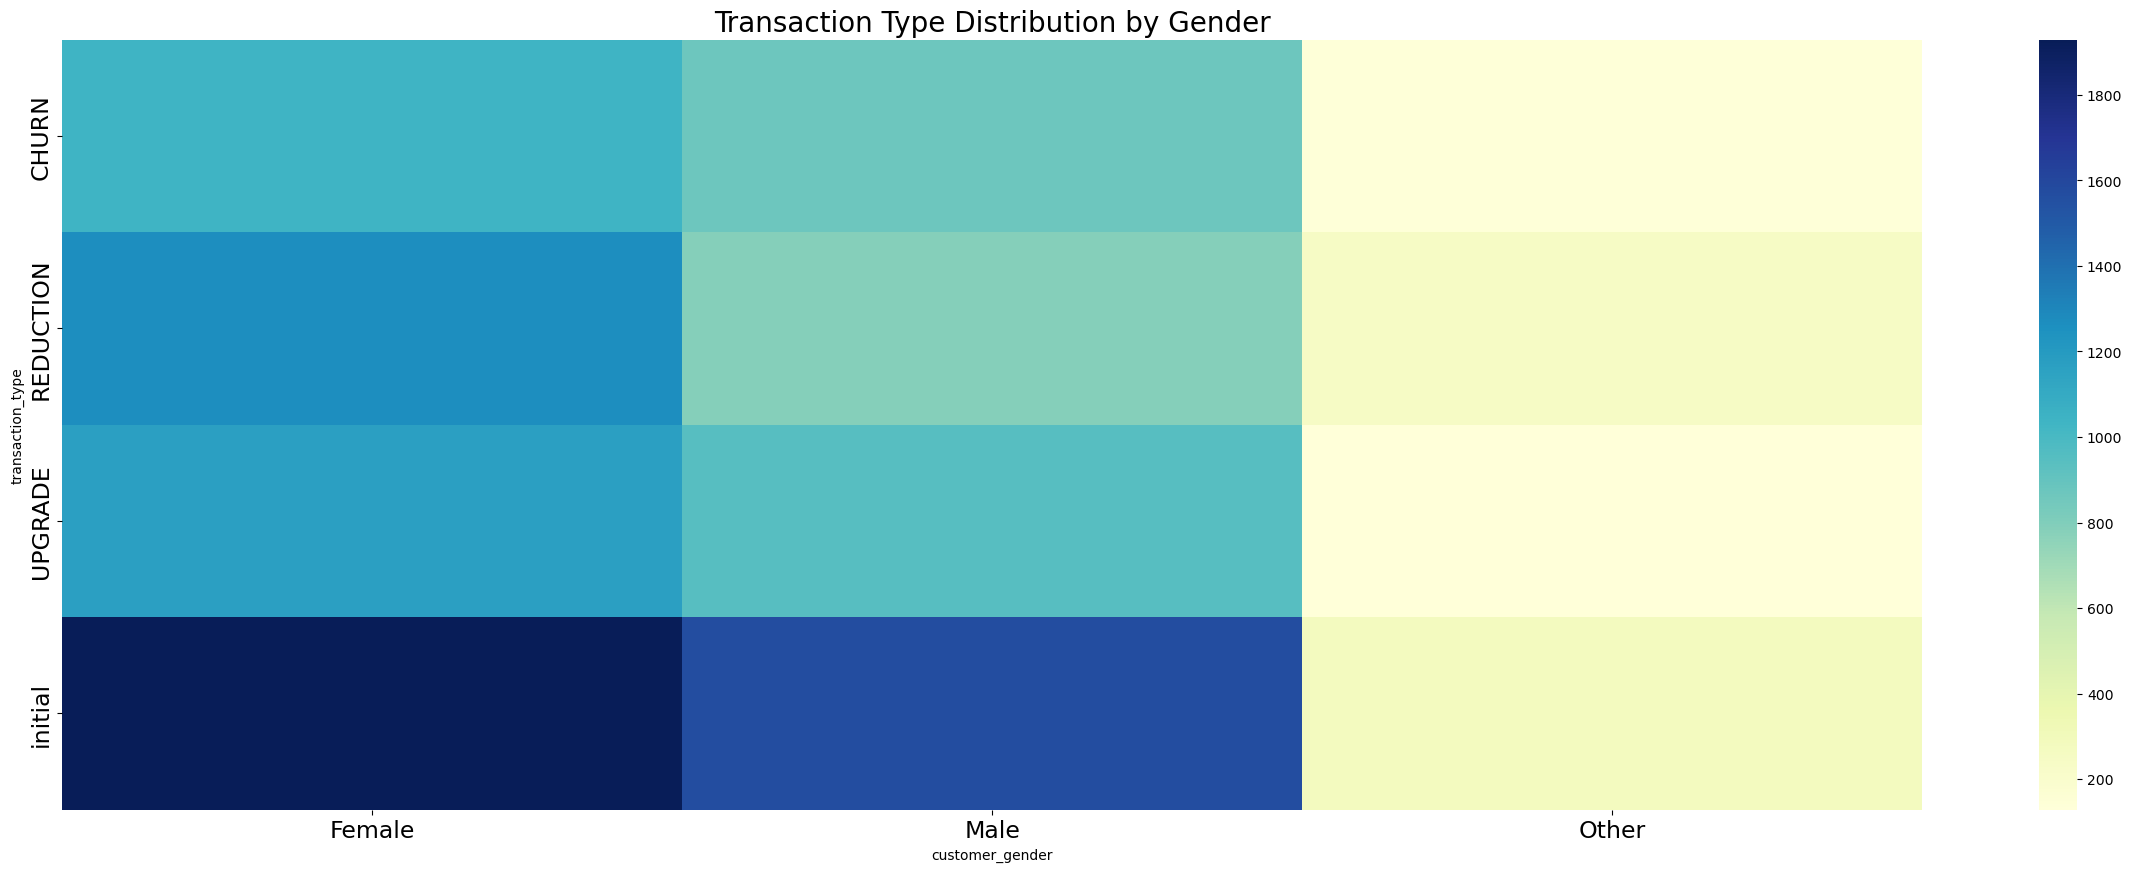

In [119]:
# 성별과 관계
pivot_data = data.pivot_table(
    index=['transaction_type'],
    columns= 'customer_gender',
    values= 'result',
    aggfunc='count'
)

# 피벗 테이블을 히트맵으로 시각화
plt.figure(figsize=(30, 10))
sns.heatmap(pivot_data, annot=False, cmap="YlGnBu")
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.title('Transaction Type Distribution by Gender', fontsize=20)
plt.show()

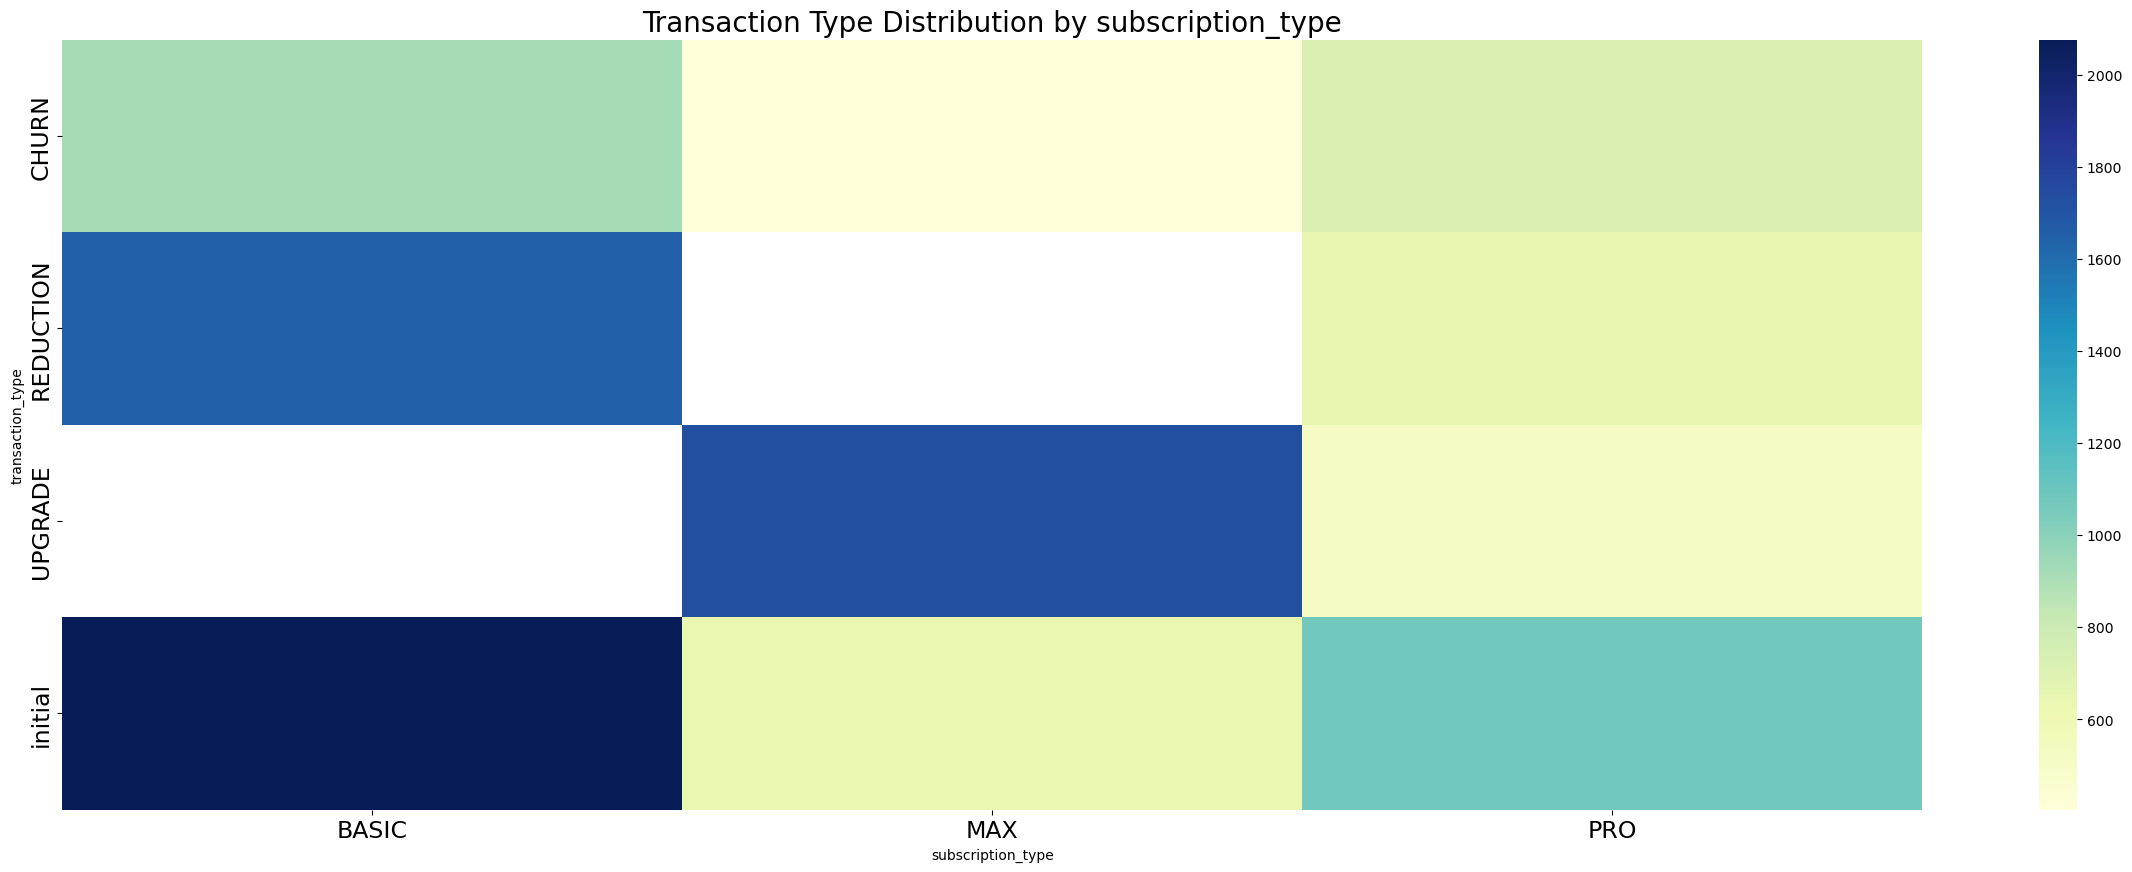

In [111]:
#구독 타입별 관계
pivot_data = data.pivot_table(
    index=['transaction_type'],
    columns= 'subscription_type',
    values= 'result',
    aggfunc='count')

# 피벗 테이블을 히트맵으로 시각화
plt.figure(figsize=(30, 10))
sns.heatmap(pivot_data, annot=False, fmt=".2f",cmap="YlGnBu")
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.title('Transaction Type Distribution by subscription_type', fontsize=20)
plt.show()

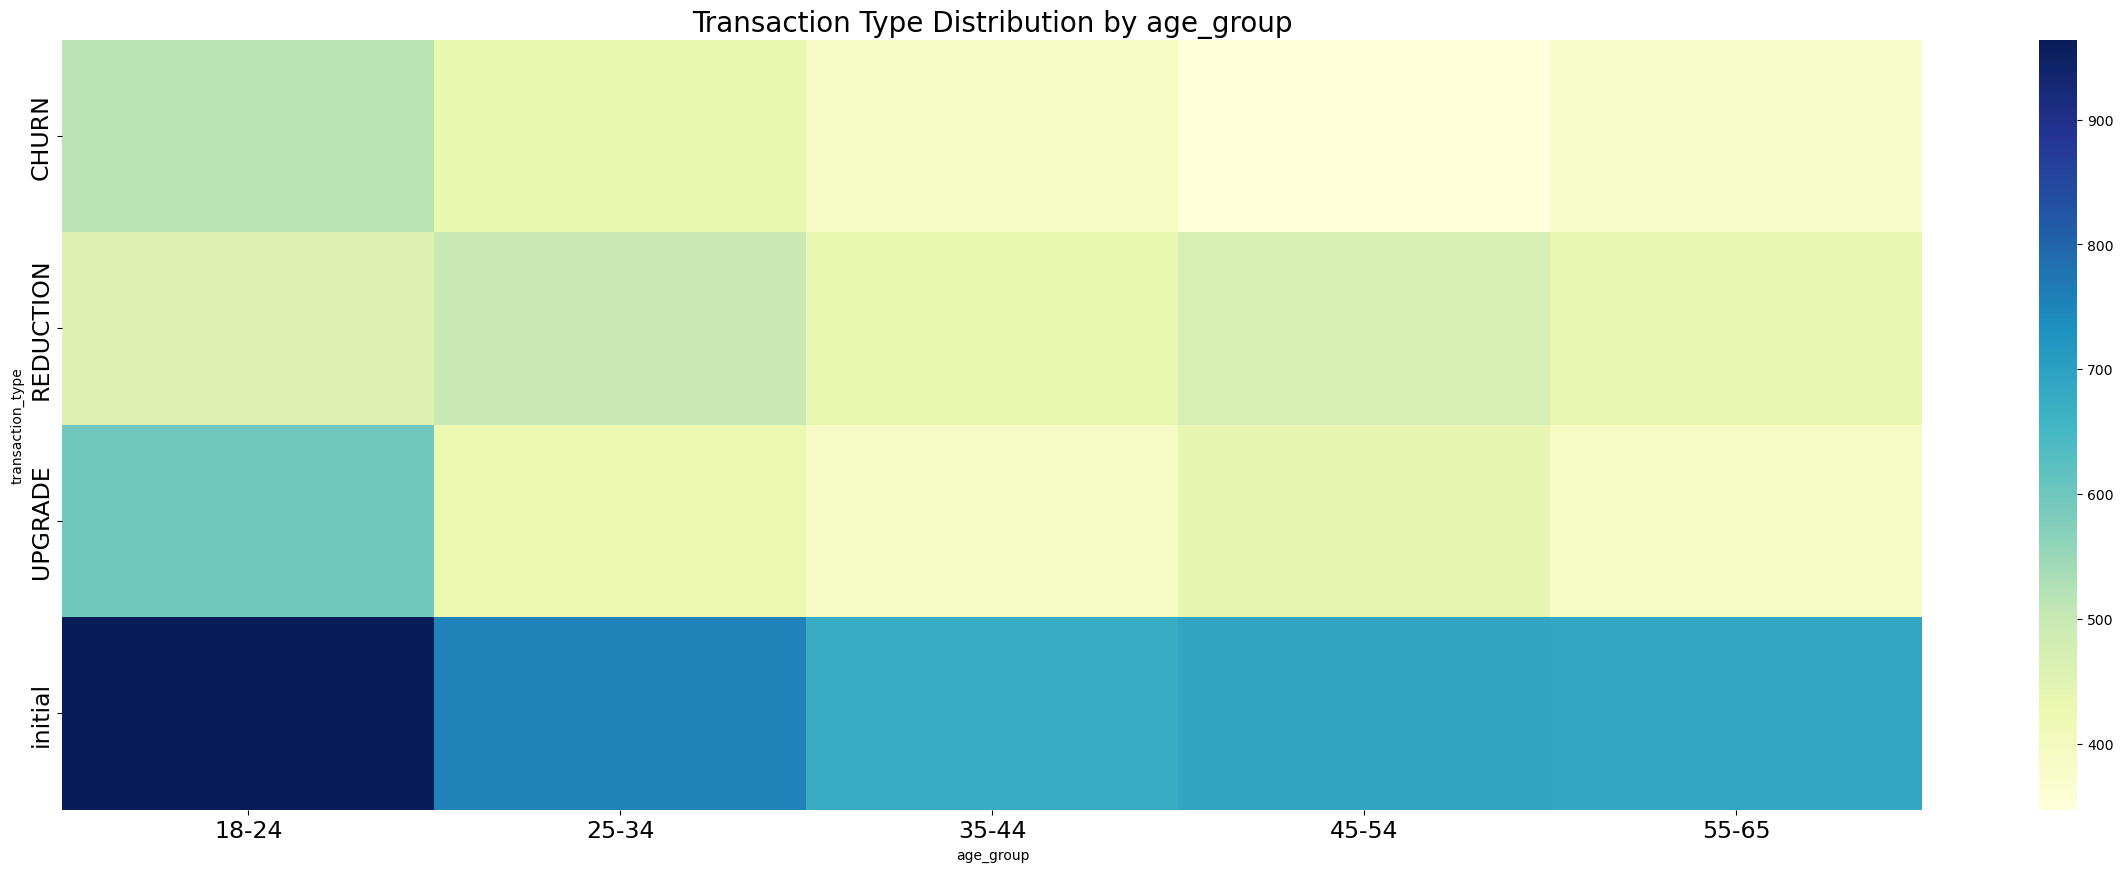

In [112]:
#  연령별 관계
pivot_data = data.pivot_table(
    index=['transaction_type'],
    columns= 'age_group',
    values= 'result',
    aggfunc='count'
)

# 피벗 테이블을 히트맵으로 시각화
plt.figure(figsize=(30, 10))
sns.heatmap(pivot_data, annot=False, cmap="YlGnBu")
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.title('Transaction Type Distribution by age_group', fontsize=20)
plt.show()

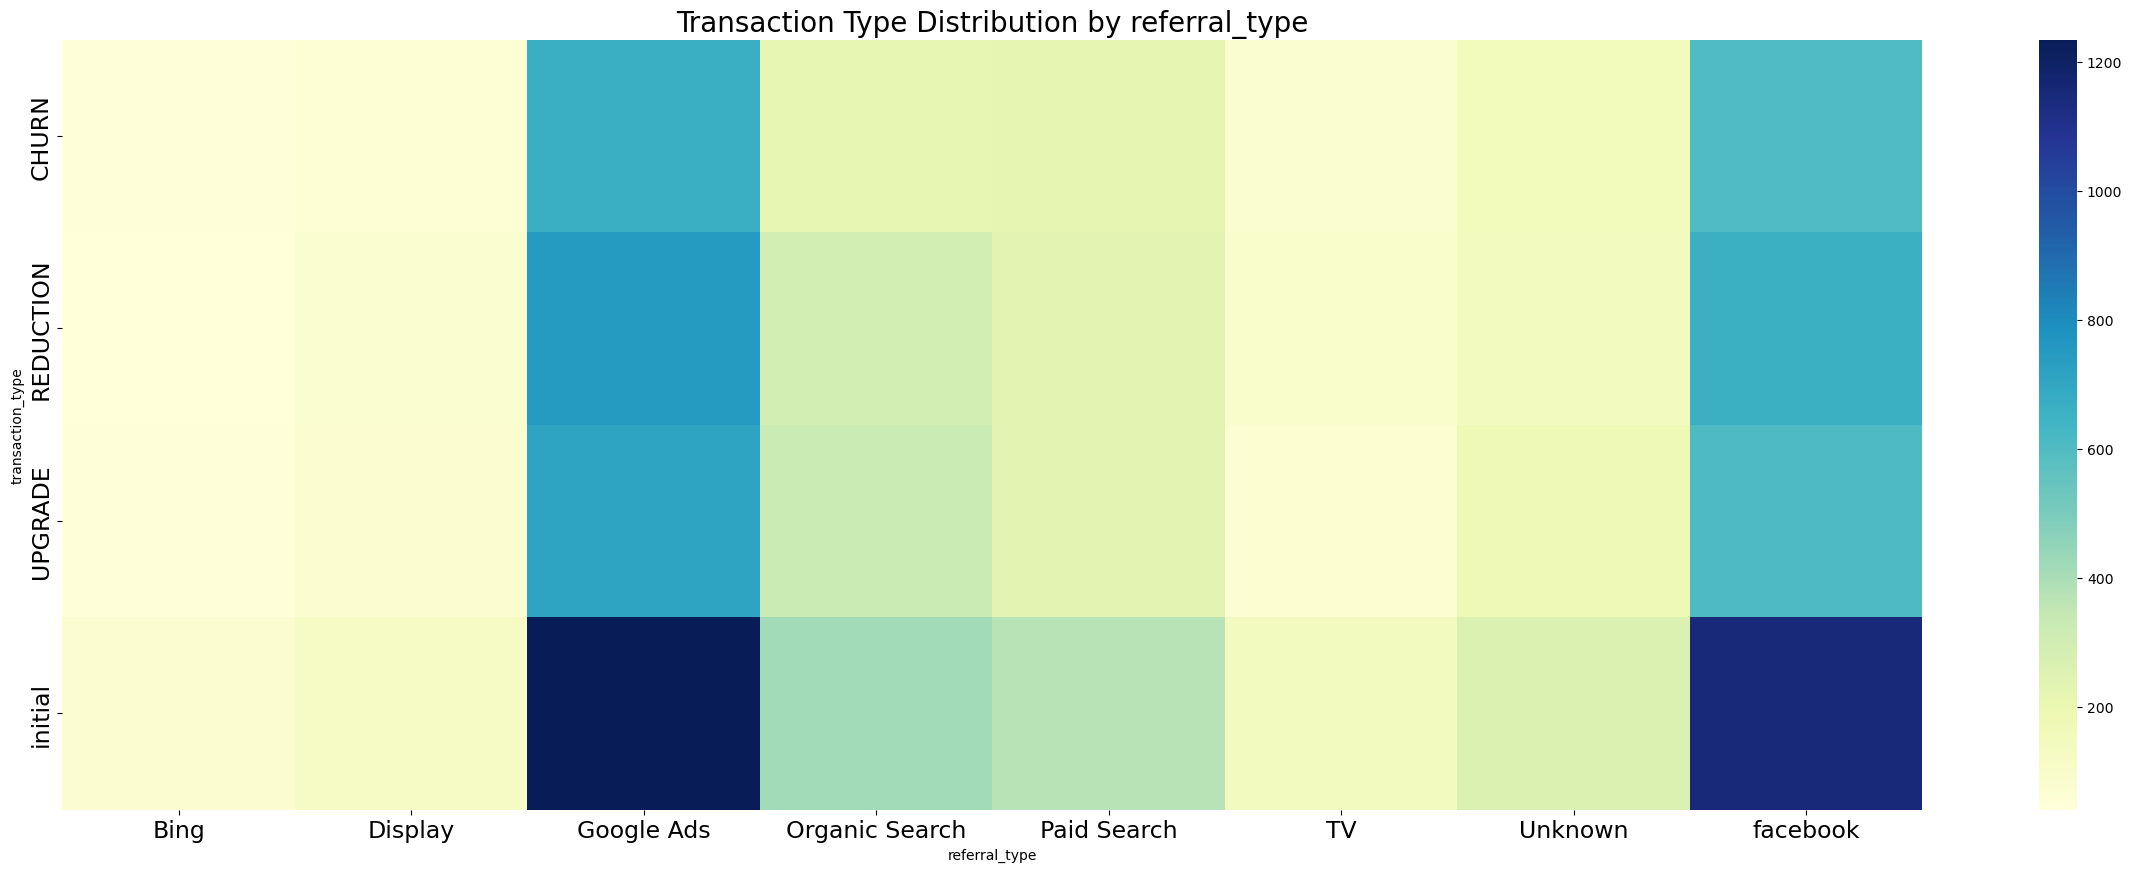

In [113]:
# 도입경로별 관계
pivot_data = data.pivot_table(
    index=['transaction_type'],
    columns= 'referral_type',
    values= 'result',
    aggfunc='count'
)

# 피벗 테이블을 히트맵으로 시각화
plt.figure(figsize=(30, 10))
sns.heatmap(pivot_data, annot=False, cmap="YlGnBu")
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.title('Transaction Type Distribution by referral_type', fontsize=20)
plt.show()

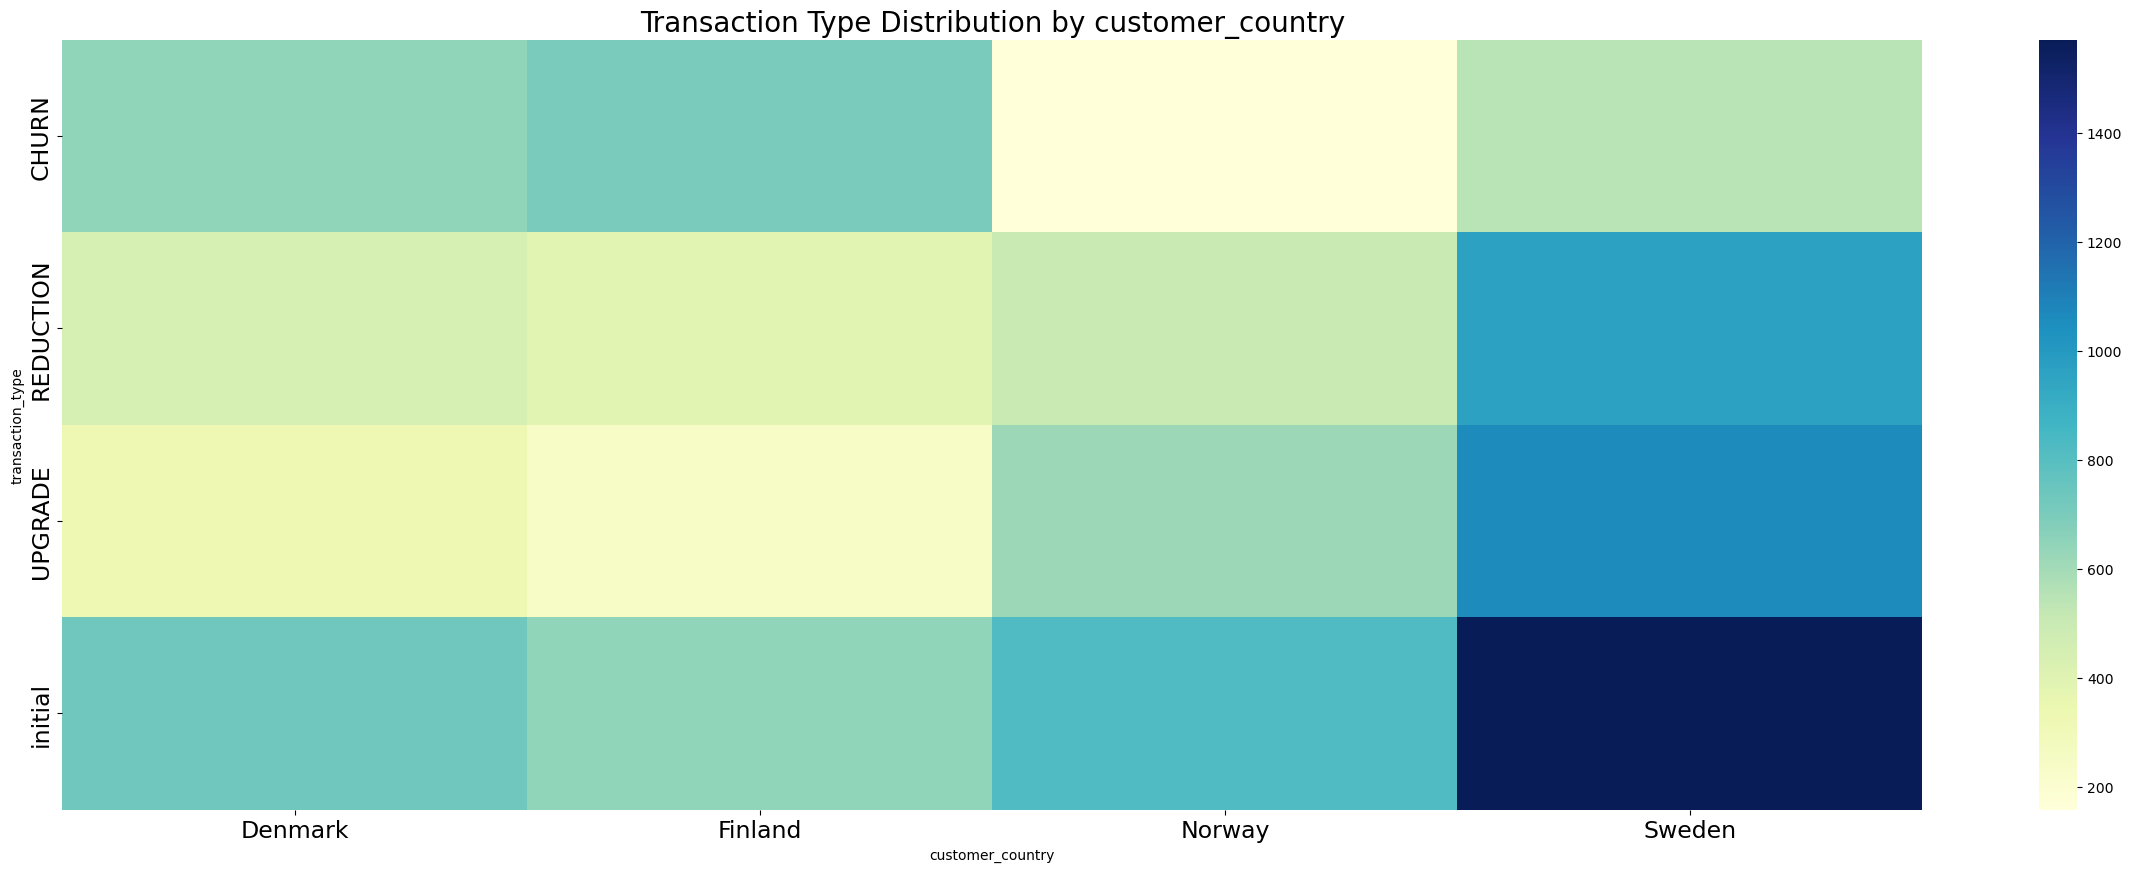

In [114]:
# 나라별 관계
pivot_data = data.pivot_table(
    index=['transaction_type'],
    columns= 'customer_country',
    values= 'result',
    aggfunc='count'
)

plt.figure(figsize=(30, 10))
sns.heatmap(pivot_data, annot=False, cmap="YlGnBu")
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.title('Transaction Type Distribution by customer_country', fontsize=20)
plt.show()

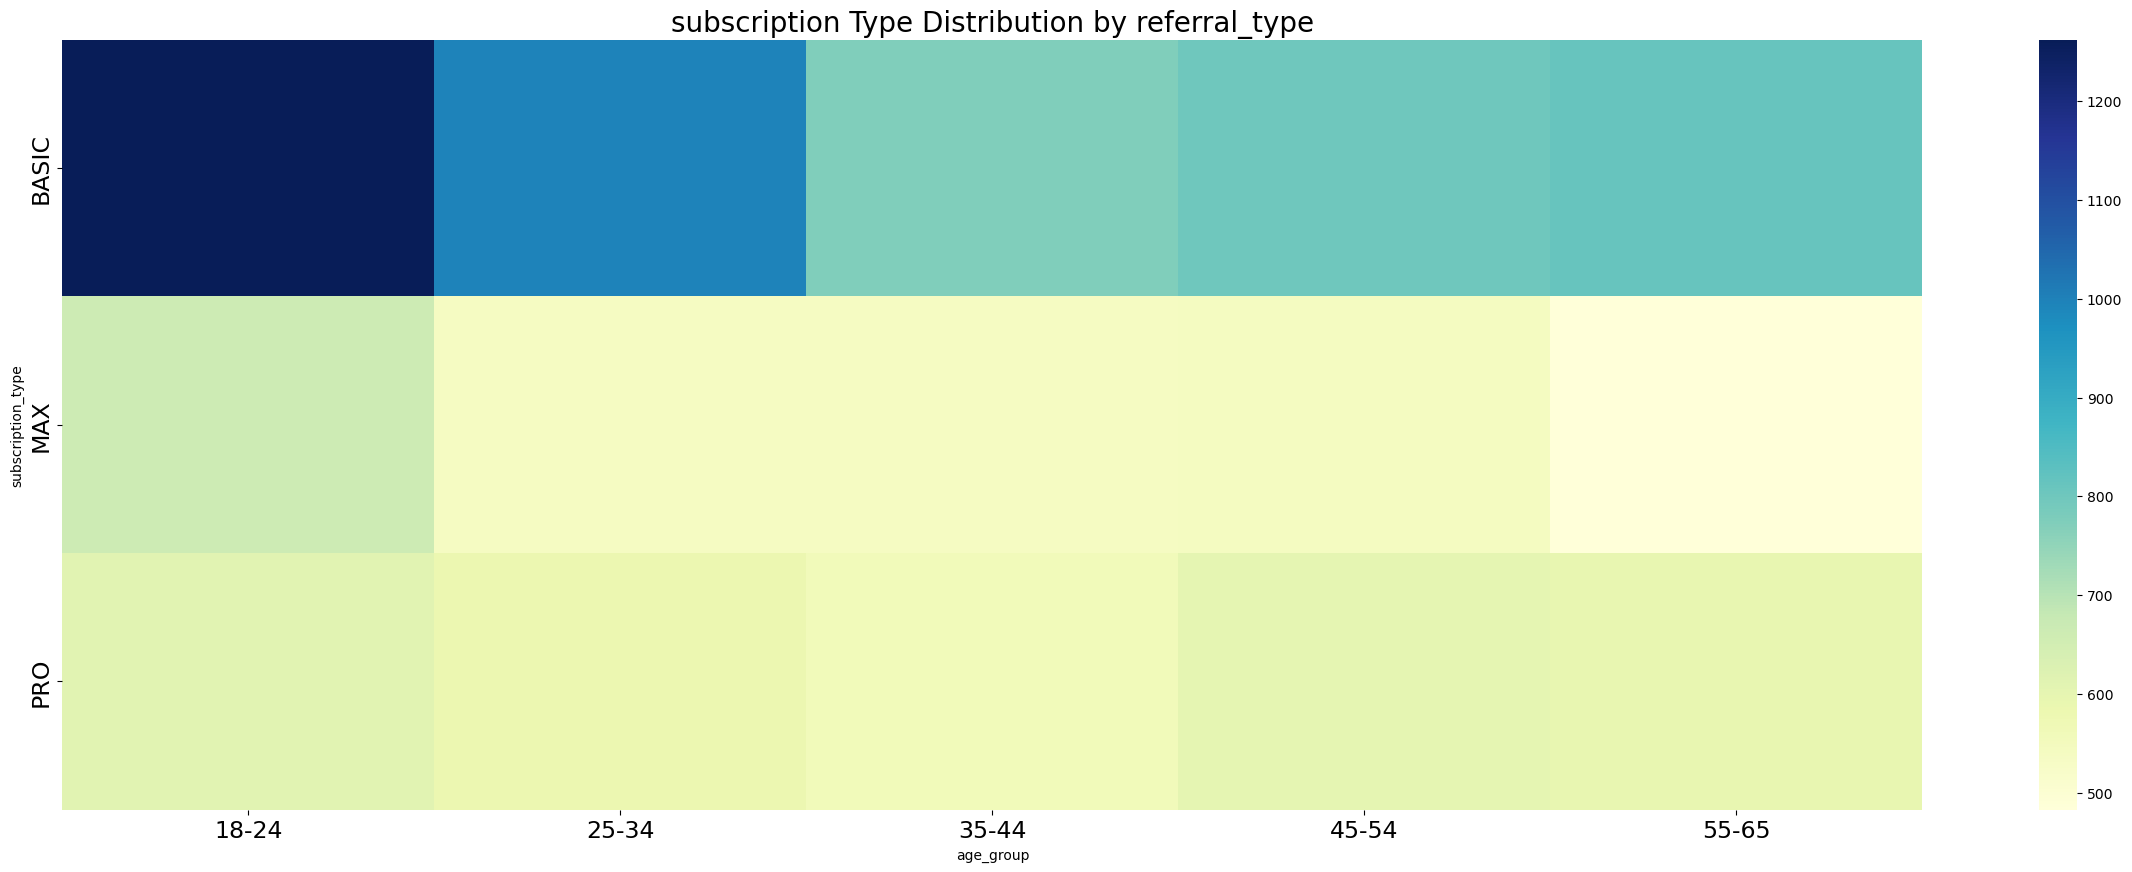

In [126]:
pivot_data = data.pivot_table(
    index=['subscription_type'],
    columns= 'age_group',
    values= 'result',
    aggfunc='count'
)

# 피벗 테이블을 히트맵으로 시각화
plt.figure(figsize=(30, 10))
sns.heatmap(pivot_data, annot=False, cmap="YlGnBu")
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.title('subscription Type Distribution by referral_type', fontsize=20)
plt.show()

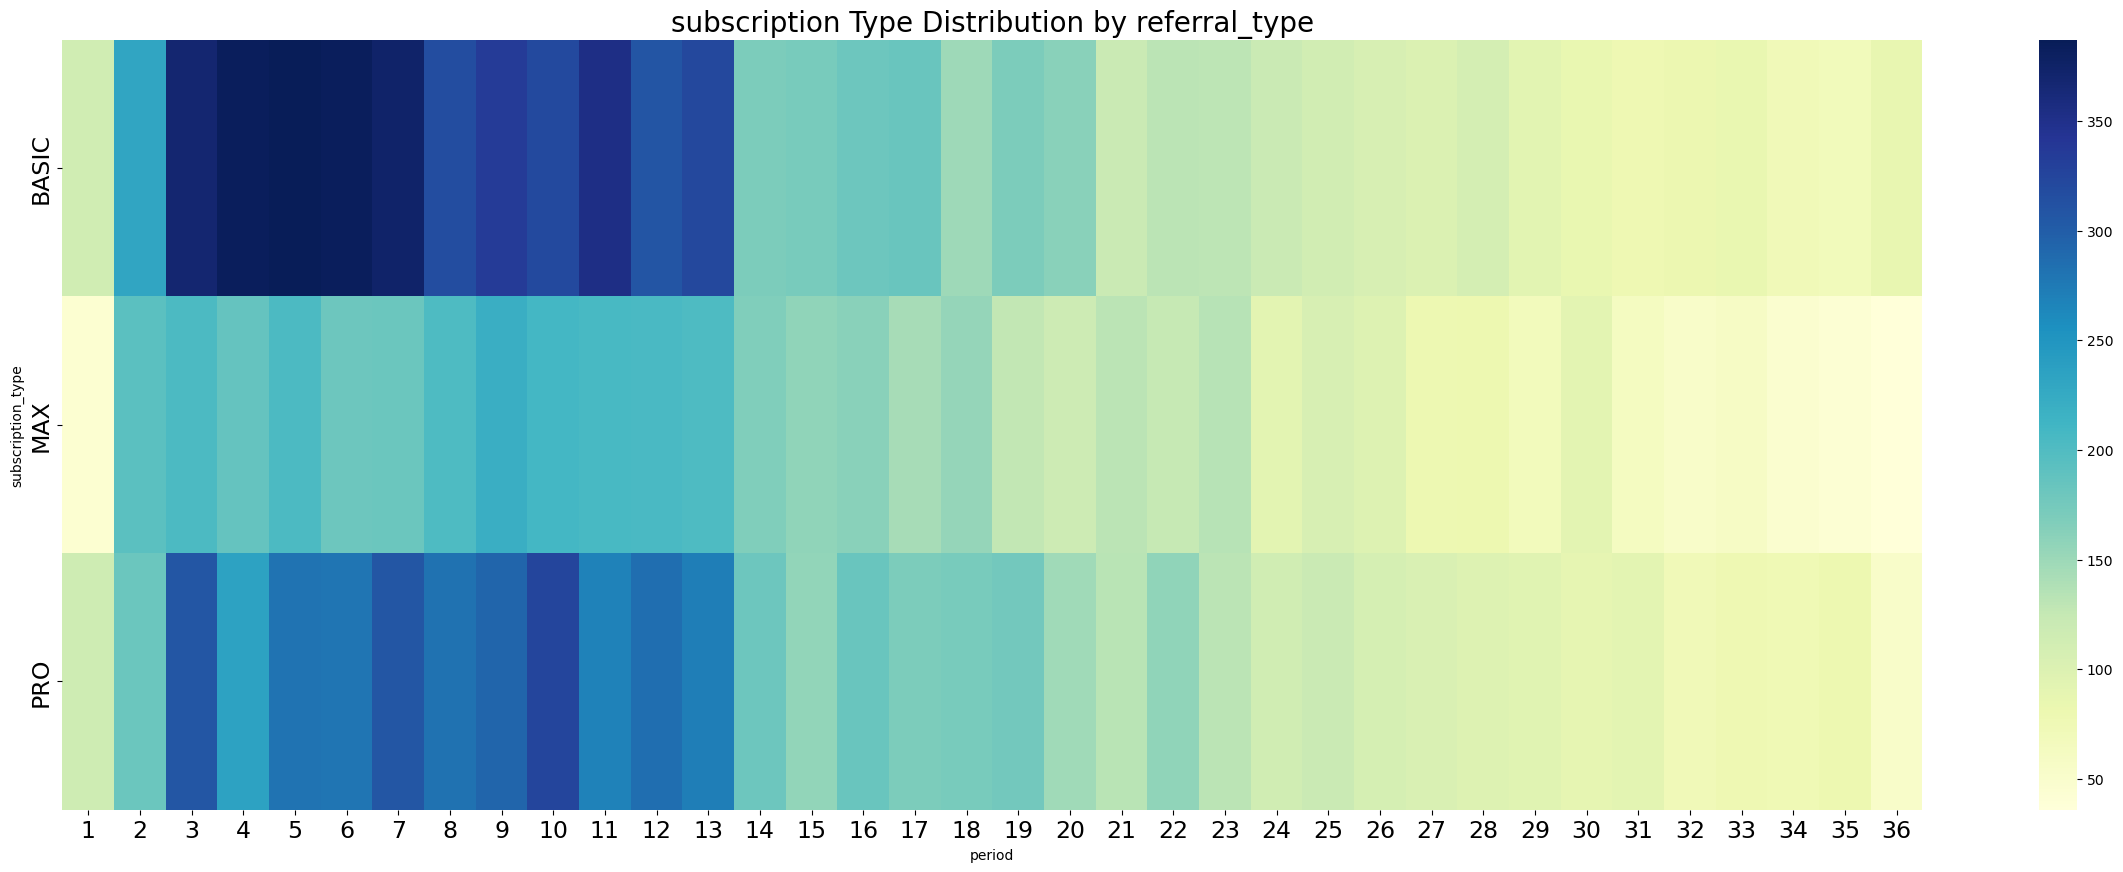

In [132]:
pivot_data = data.pivot_table(
    index=['subscription_type'],
    columns= 'period',
    values= 'churn_result',
    aggfunc='count'
)

# 피벗 테이블을 히트맵으로 시각화
plt.figure(figsize=(30, 10))
sns.heatmap(pivot_data, annot=False, cmap="YlGnBu")
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.title('subscription Type Distribution by referral_type', fontsize=20)
plt.show()